In [1]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
trainy[0]

9

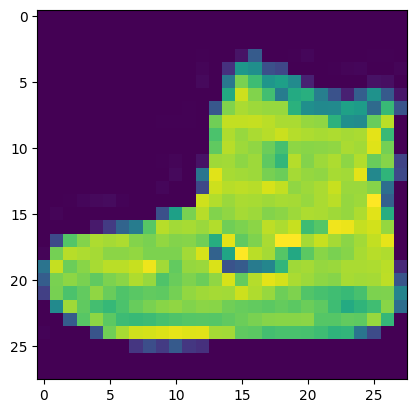

In [8]:
plt.imshow(trainX[0])

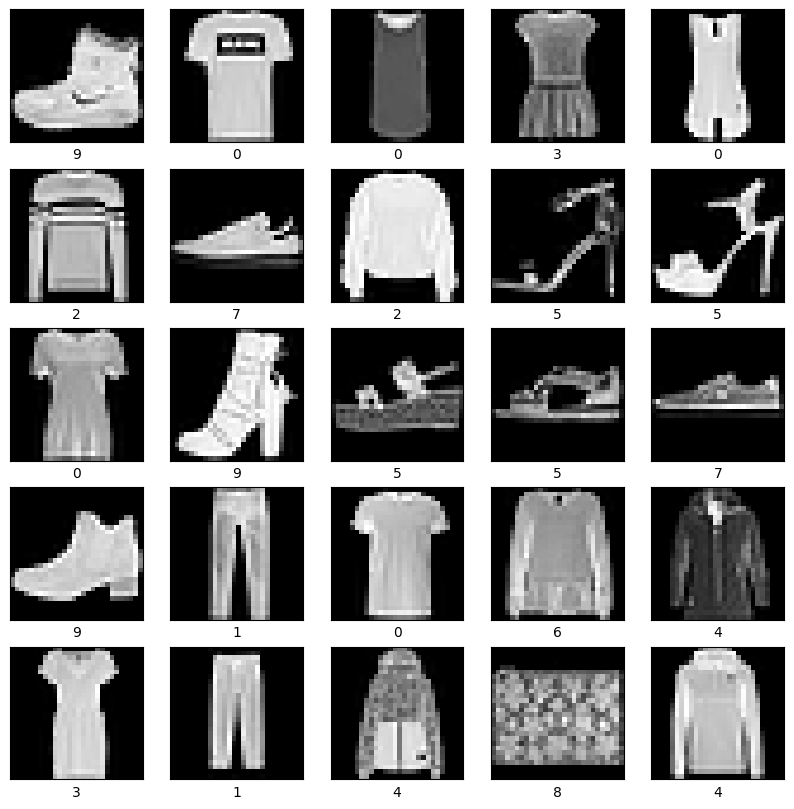

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(trainX[i],cmap = 'gray')
  plt.xlabel(trainy[i])

In [11]:
#normalizing x_train and x_test
trainX = trainX/255
testX = testX/255

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD

In [13]:
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [14]:
trainy[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [16]:
model.compile(optimizer= 'SGD',loss ='categorical_crossentropy',
              metrics =['accuracy'])

In [18]:
mode_mnist = model.fit(trainX,trainy,epochs = 10,
                       validation_data=(testX,testy))

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.7419 - accuracy: 0.7374 - val_loss: 0.5523 - val_accuracy: 0.8032
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4962 - accuracy: 0.8235 - val_loss: 0.4771 - val_accuracy: 0.8291
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4451 - accuracy: 0.8432 - val_loss: 0.4606 - val_accuracy: 0.8338
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4097 - accuracy: 0.8551 - val_loss: 0.4147 - val_accuracy: 0.8529
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3822 - accuracy: 0.8660 - val_loss: 0.4047 - val_accuracy: 0.8568
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3602 - accuracy: 0.8738 - val_loss: 0.4102 - val_accuracy: 0.8536
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3418 - accuracy: 0.8788 - val_loss: 0.3617 -

In [24]:
#loading image to test
from google.colab import files
import io
from PIL import Image

In [37]:
image='/content/full sleeve.png'

In [38]:
new_image = Image.open(image).convert('L')#gray scale
new_image = new_image.resize((28,28))#resizing to 28*28
new_image = np.array(new_image) #converting to numpy array
new_image = new_image.reshape((1,28,28,1)).astype('float32')/255
#reshaping and normalising

In [39]:
pred = model.predict(new_image)
pred_op = np.argmax(pred)
print(pred_op)

1/1 [==============================] - 0s 30ms/step
9
